In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
data=pd.read_csv("HR-Employee-Attrition.csv")

## Understanding the data

In [101]:
#checking size of data
data.shape

(1470, 35)

In [102]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [103]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [104]:
data.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [105]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [106]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [107]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [108]:
# Above 3 columns contain same values in every row. As These columns do not provide any information let us remove.
del data['EmployeeCount']
del data['StandardHours']
del data['Over18']

In [109]:
data.shape

(1470, 32)

In [110]:
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [111]:
#'Business travel' is an ordinal categorical variable. This can be converted to numerical variable.
dict={'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2}
data['BusinessTravel']=data['BusinessTravel'].map(dict)

In [112]:
data['BusinessTravel'].unique()

array([1, 2, 0], dtype=int64)

## Checking for missing values in data

In [113]:
data.isnull().sum()
#technically there are no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [114]:
#checking for unwanted symbols such as ?,_,- or spaces in object type columns 
objcol=data.select_dtypes('object').columns
objcol

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [115]:
for i in objcol:
    print(data[i].unique())
#'?' or " " are not present  

['Yes' 'No']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']


## Analysing relationship between dependent variables

In [116]:
numdata=data.select_dtypes('int64')
objdata=data[objcol]

In [117]:
# checking statistical measures of numerical variables
data.describe().T
# 9 numerical columns- [WorkLifeBalance ,StockOptionLevel,RelationshipSatisfaction,PerformanceRating,JobSatisfaction,JobLevel,..
#..JobInvolvement,EnvironmentSatisfaction,Education] are categorical and ordinal in nature.

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
BusinessTravel,1470.0,1.086395,0.532170,0.0,1.00,1.0,1.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [118]:
data.describe(include='O').T
# All object type variables are categorical and nominal in nature.

,count,unique,top,freq
Attrition,1470,2,No,1233
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [119]:
# checking correlation between columns
correlation=data.corr()

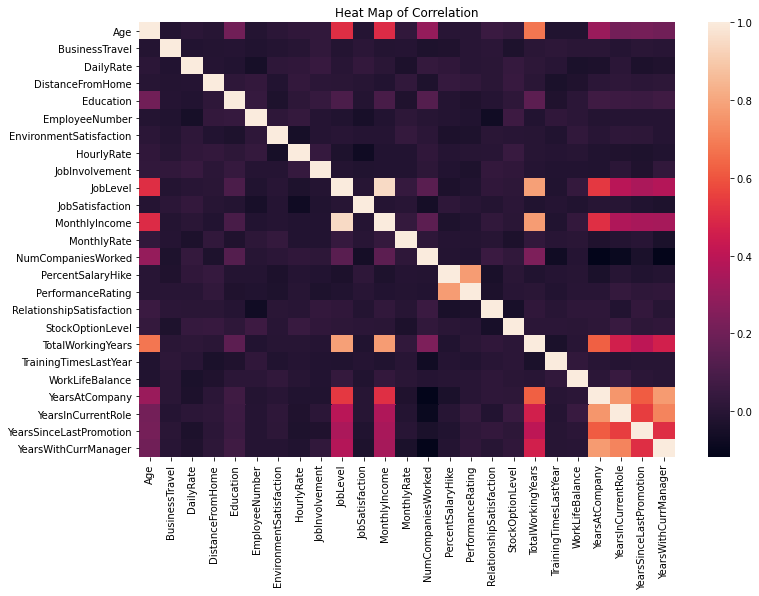

In [120]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation)
plt.title('Heat Map of Correlation')
plt.show()

In [121]:
#observations from heat map
# 1. monthly income and Job level are highly correlated
data['MonthlyIncome'].corr(data['JobLevel'])
#So removing 'JobLevel' from the dataset
data.drop('JobLevel',axis=1,inplace=True)

In [122]:
# 2. Performance rating and percent salary hike are also showing good correlation
data['PercentSalaryHike'].corr(data['PerformanceRating'])

0.7735499964012681

In [123]:
# 3. TotalWorkingYears has good correlation with Age and MonthlyIncome
data['TotalWorkingYears'].corr(data['Age']),data['TotalWorkingYears'].corr(data['MonthlyIncome'])

(0.6803805357911983, 0.772893246254356)

## Data Cleaning and Preprocessing

### Checking For Outliers

In [124]:
numcols=objcol=data.select_dtypes(include=['int64','float64']).columns
numcols

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

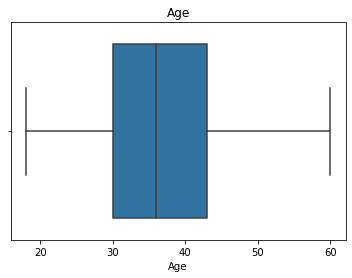

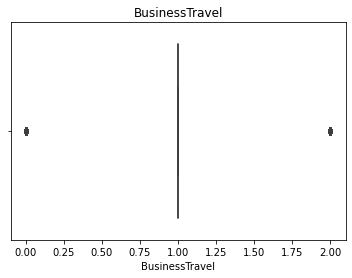

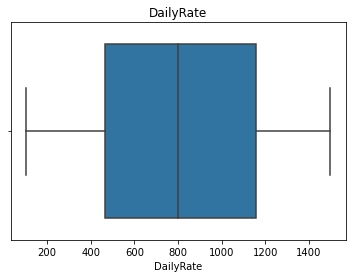

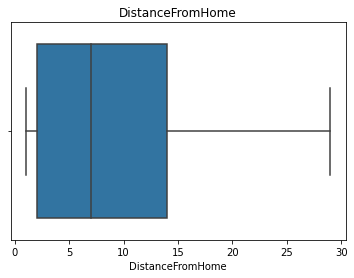

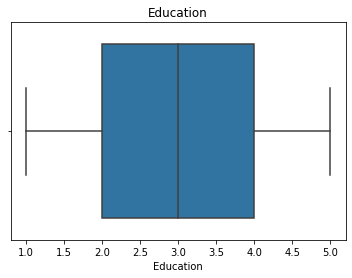

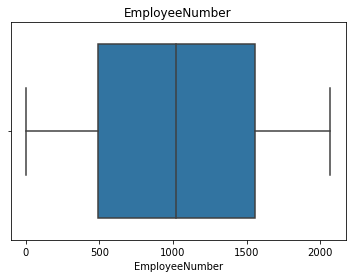

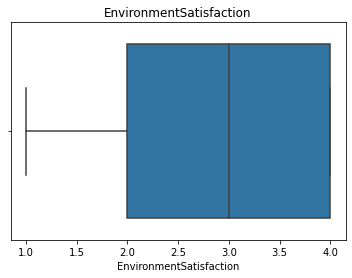

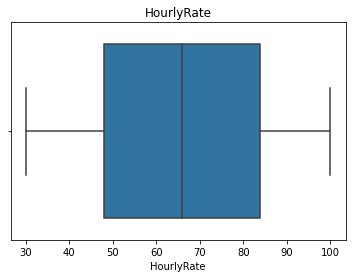

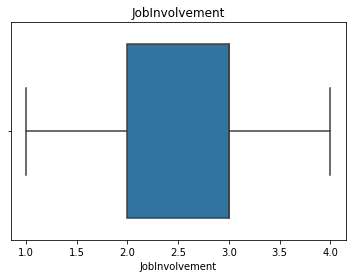

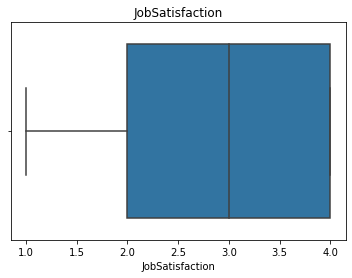

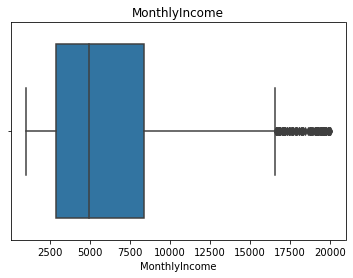

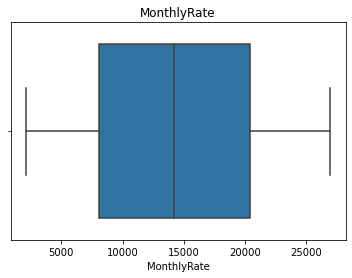

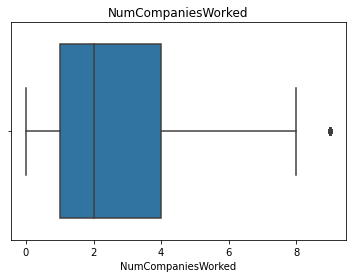

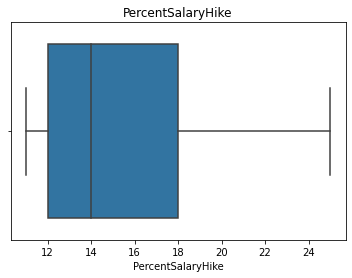

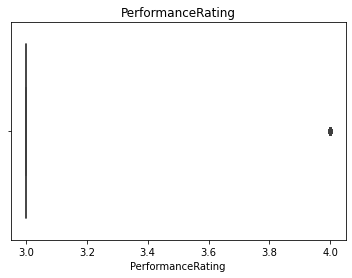

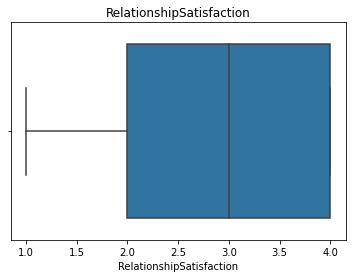

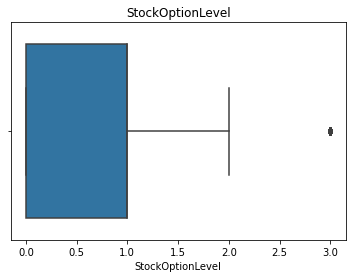

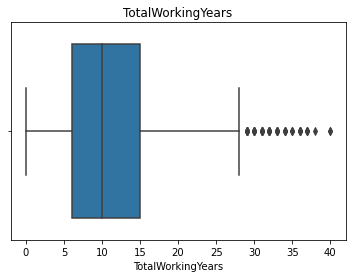

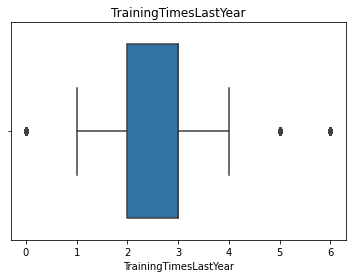

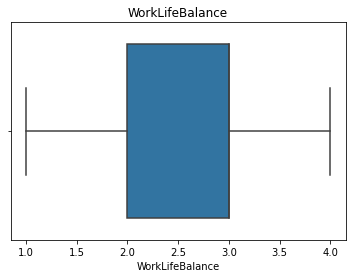

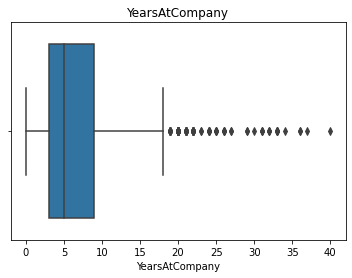

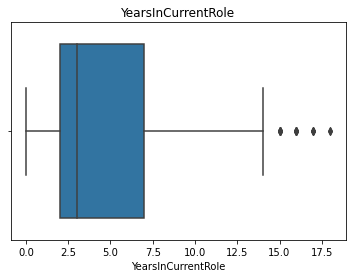

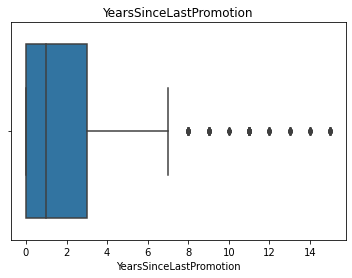

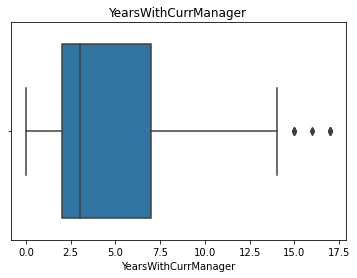

In [125]:
import warnings
warnings.filterwarnings('ignore')
# BoxPlot for finding outliers
for col in numcols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [126]:
# Ignore numerical variables which are categorical in nature. Not considering those variables for outliers removal
numcols.drop(['BusinessTravel','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance'])

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [127]:
#Replace Outlier Values
for col in numcols:
    UR=data[col].describe()['75%']
    LR=data[col].describe()['25%']
    IQR=UR-LR                             #Inter Quartile Range calculation
    UL=UR+(1.5*IQR)                       #Upper Limit calculation
    LL=LR-(1.5*IQR)                       #Lower Limit calcultion
    data[col][data[col]>UL]=UL            # Replacing all values above upper limit with UL
    data[col][data[col]<LL]=LL            # Replacing all values below lower limit with LL

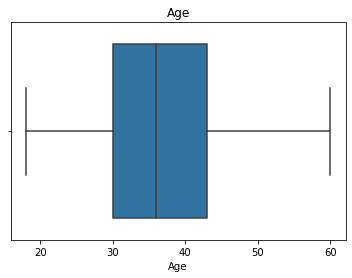

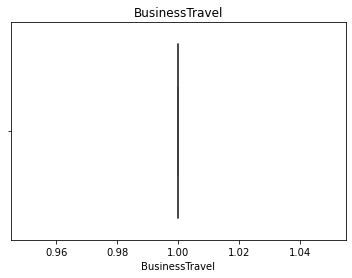

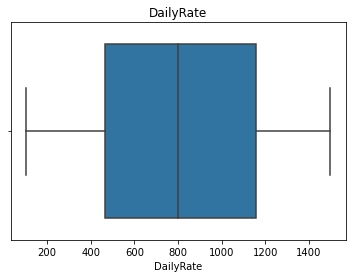

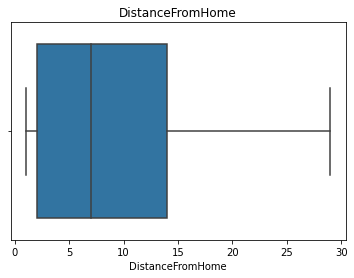

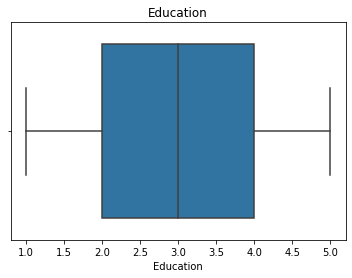

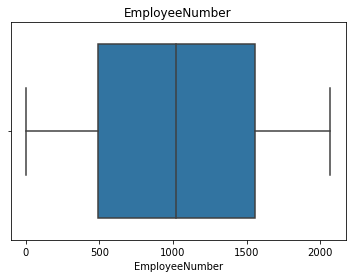

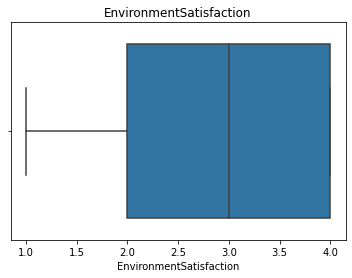

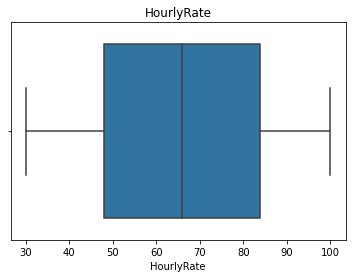

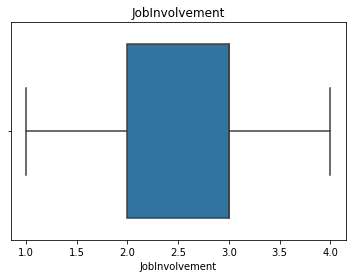

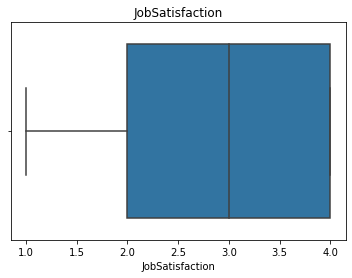

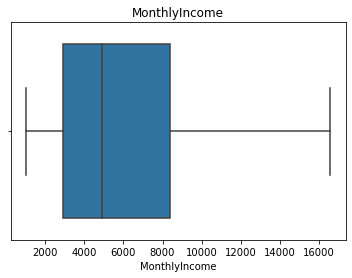

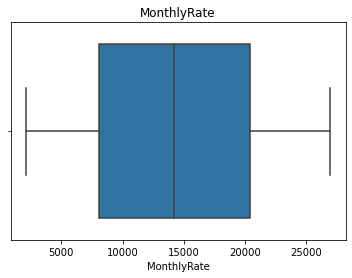

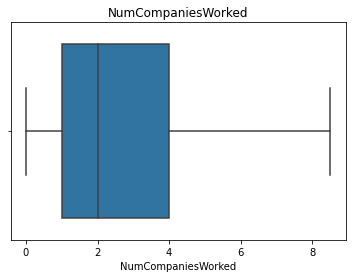

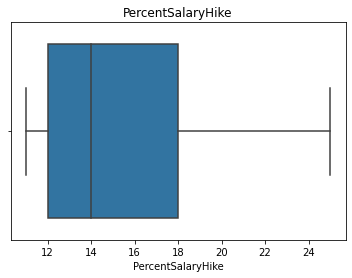

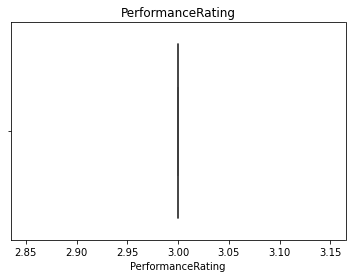

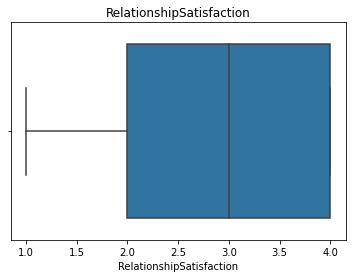

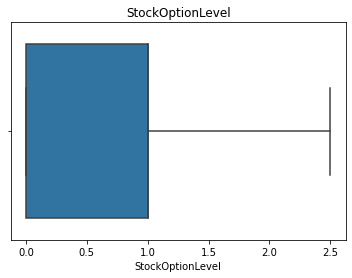

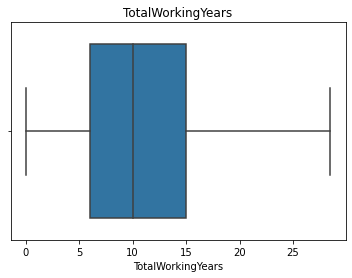

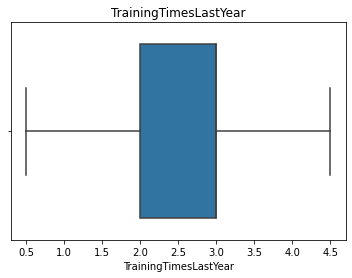

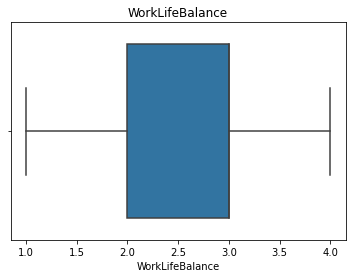

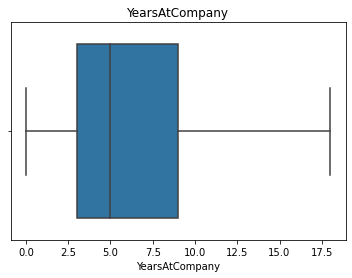

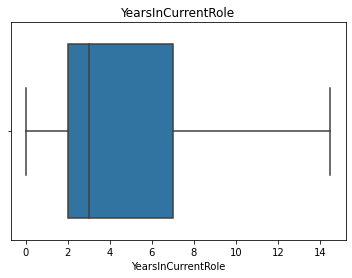

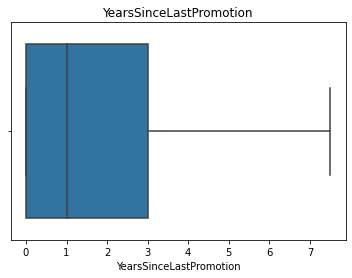

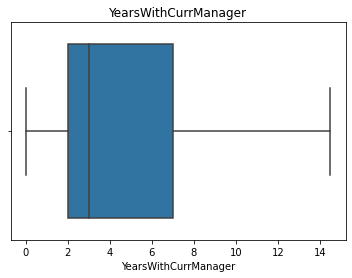

In [128]:
#Verifying columns after the removal of outliers
for col in numcols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

### Categorical Variables to Numerical - using One-hot Encoding

In [129]:
#Storing Numerical and Caegorical data into different variables
objdata=data.select_dtypes('object')
numdata=data.select_dtypes(include=['int64','float64'])

In [130]:
objdata.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [131]:
#Categorical Variables are converted to numeric variables using OneHot encoding method
categ_data=pd.get_dummies(objdata,drop_first=True)

In [132]:
categ_data.shape,numdata.shape

((1470, 20), (1470, 24))

In [133]:
categ_data.head()

,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [134]:
#Storing all variables into a new variable
data=pd.concat([numdata,categ_data],axis=1)

In [135]:
data.shape

(1470, 44)

## Modelling the Data using Logistic Regression

In [136]:
data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Yes', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executi

In [137]:
data.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,4,...,0,0,0,0,0,1,0,0,1,1
1,49,1,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1,1392,3,4,5,4,56,3,3,...,0,0,0,0,1,0,0,1,0,1
4,27,1,591,2,1,7,1,40,3,2,...,1,0,0,0,0,0,0,1,0,0


### Convert data set into x and y

In [138]:
y=data['Attrition_Yes']
x=data.drop('Attrition_Yes',axis=1)

In [139]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_Yes, Length: 1470, dtype: uint8

### Finding Variance Inflation Factor (VIF)

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#create VIF dataframe
VIF=pd.DataFrame()
VIF["features"]=x.columns

In [141]:
VIF["VIF_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [142]:
VIF[VIF['VIF_value']>10]
# If the variables with high VIFs are dummy variables representing nominal variables with three or more categories, 
# those are usually not a problem. So no need to remove dummy variables.

,features,VIF_value
24,Department_Research & Development,43.696359
25,Department_Sales,43.865789
26,EducationField_Life Sciences,24.054094
27,EducationField_Marketing,10.848411
28,EducationField_Medical,21.601835
38,JobRole_Sales Executive,14.580015


 ### Creating Logistic Regression Model

In [143]:
# splitting the data set into train and test data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [144]:
# importing logistic regression object
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [145]:
# Fitting the model
logreg.fit(x_train,y_train)

LogisticRegression()

In [146]:
#verifying model coefficients
m=logreg.coef_
m

array([[-1.66610519e-02,  2.72794298e-04, -3.68279079e-04,
         4.06210497e-02,  2.73865308e-03, -3.46711860e-05,
        -1.56249041e-02,  1.44839815e-03, -1.43832928e-02,
        -1.90784256e-02, -5.69250262e-05, -4.74247858e-07,
         4.61253064e-02, -7.68231162e-04,  8.18382893e-04,
        -3.42879494e-03, -2.24045325e-02, -2.86367005e-02,
        -7.35580337e-03, -4.63838507e-03, -4.37796337e-02,
        -4.72942660e-02,  1.07480575e-02, -3.77147983e-02,
        -7.76975874e-03,  7.46417008e-03, -3.92824656e-03,
         3.45084852e-03, -3.02903676e-03, -6.22467642e-04,
         3.27949299e-03,  2.89151759e-03,  7.24093602e-04,
         3.03302578e-03,  2.18550579e-04, -3.02936946e-03,
        -7.50290234e-04, -3.70786559e-03,  2.23710503e-03,
         4.95925732e-03, -7.41490105e-03,  1.44434641e-02,
         2.16972711e-02]])

In [147]:
c=logreg.intercept_
c

array([0.00027272])

In [148]:
# Accuracy score for testing
logreg.score(x_test,y_test)

0.8722826086956522

In [149]:
# Accuracy score for training
logreg.score(x_train,y_train)

0.8330308529945554

In [150]:
#predicting the test set using fitted model 
y_test_pred=logreg.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       1.00      0.02      0.04        48

    accuracy                           0.87       368
   macro avg       0.94      0.51      0.49       368
weighted avg       0.89      0.87      0.82       368



In [151]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[320   0]
 [ 47   1]]


In [152]:
TP=320
FP=0
TN=1
FN=47
acc=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy : ",acc)

Accuracy :  0.8722826086956522
